In [6]:
import numpy as np
from IntegrableResonanceModel import IntegrableResonanceModel
import matplotlib.pyplot as plt
%matplotlib inline

# Energy contour levels 
This notebook illustrates how to make a contour plot showing constant energy levels,  $E = {\cal H}(J,\theta;J^*)$
where ${\cal H}$ is the Hamiltonian given in Equation (24).

The user specifies $J^*$ by defining the quantity $Z_0$ so that
$$
J^* = \frac{f^2+g^2}{\tilde f^2 +\tilde g^2} Z_0^2~
$$
(see Equation 20).
This enusres the value of $Z$ at the center of the resonance is $\approx Z_0$.
The grid is plotted in variables $(\Delta,\theta)$ where
$$\Delta = \frac{j-k}{j}\frac{P_2}{P_1}-1$$
is related to the canonical momenta by Equation 21:
$$
 \Delta=\frac{3(\mu_1+\mu_2)\left(j\mu_1\sqrt{\alpha_0}+(j-k)\mu_2\right)}{2k\sqrt{\alpha_0}\mu_1\mu_2}(J-J^*)
$$

In [7]:
# Get object for resonance model
res_model=IntegrableResonanceModel(3,1)

In [8]:
# Set Z0 
Z0 = 0.15

# Define grid to compute values on
Ngrid = 128
thetas = np.linspace(0*np.pi,2*np.pi,128)
Deltas =  np.linspace(-0.015,0.015,Ngrid)

Jstar = res_model.Zsq_to_J() * Z0**2
Jvals = Jstar + Deltas / res_model.dJ_to_Delta()

Energy = np.reshape([res_model.H([theta,0,J,Jstar]) for J in Jvals for theta in thetas],(Ngrid,Ngrid))
X,Y = np.meshgrid(thetas,Deltas)

yunst = res_model.unstable_fixed_point(Jstar)
Eunst = res_model.H(yunst)

yell = res_model.elliptic_fixed_point(Jstar)
Eell = res_model.H(yell)

In [11]:
y0 = yell + np.array([2.5,0,0,0])
sim = res_model.dyvars_to_rebound_sim(y0)
E0 = res_model.H(y0)
ps = sim.particles
times = np.linspace(0,500* ps[2].P,200)
Delta = np.zeros(len(times))
theta = np.zeros(len(times))
for i,t in enumerate(times):
    sim.integrate(t)
    Delta[i] = (res_model.j-res_model.k) * ps[2].P/ps[1].P / res_model.j - 1
    Q = res_model.j * ps[2].l - (res_model.j-res_model.k) * ps[1].l
    z1 = ps[1].e * np.exp(1j * ps[1].pomega)
    z2 = ps[2].e * np.exp(1j * ps[2].pomega)
    z = np.angle(res_model.f * z1 + res_model.g * z2)
    theta[i] = np.mod(Q/res_model.k - z,2*np.pi)
    Delta[i] = (res_model.j-res_model.k) * ps[2].P/ps[1].P / res_model.j - 1

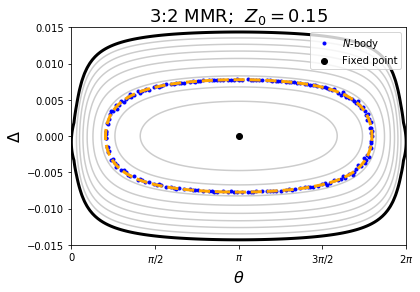

In [12]:
# N-body points
plt.plot(theta,Delta,'b.',zorder=1,label=r'$N$-body')

# Energy level of N-body initial conditions
plt.contour(X,Y,Energy,[E0],colors=['orange'],linestyles = ['--'],linewidths=[3],zorder=2)

# Background energy levels
plt.contour(X,Y,Energy,np.linspace(Eunst,Eell,10)[:-1],colors=['gray'],linestyles = ['-'],alpha=0.4)

# Separatrix
plt.contour(X,Y,Energy,[Eunst],linewidths=[3],colors=['k'],linestyles = ['-'])

# Fixed point
plt.scatter([yell[0] + i * 2*np.pi/res_model.k for i in range(res_model.k)],
            [res_model.dJ_to_Delta() * (yell[2] -yell[3]) for _ in range(res_model.k)],
            color='black',
            marker='o',
            label="Fixed point"
           )

# Make plot pretty...
plt.legend()
plt.xlabel(r"$\theta$",fontsize = 16)
plt.ylabel(r"$\Delta$",fontsize = 16)
ax = plt.gca()
plt.xticks([0,np.pi/2,np.pi,3*np.pi/2,2*np.pi])
ax.xaxis.set_ticklabels(["0",r"$\pi/2$",r"$\pi$",r"$3\pi/2$",r"$2\pi$"]);
plt.title("{}:{} MMR;  $Z_0={:.2f}$".format(res_model.j,res_model.j-res_model.k,Z0),fontsize = 18)